In [0]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/Volumes/workspace/default/netflixdata/netflix_titles_cleaned.csv"
df = pd.read_csv(file_path)
print(df.info())
print(df.head())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   show_id        8807 non-null   object 
 1   type           8807 non-null   object 
 2   title          8807 non-null   object 
 3   director       8807 non-null   object 
 4   cast           8807 non-null   object 
 5   country        8807 non-null   object 
 6   date_added     8807 non-null   object 
 7   release_year   8807 non-null   int64  
 8   rating         8807 non-null   object 
 9   duration       8807 non-null   object 
 10  listed_in      8807 non-null   object 
 11  description    8807 non-null   object 
 12  duration_num   8807 non-null   float64
 13  duration_unit  8807 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 963.4+ KB
None
  show_id     type  ... duration_num duration_unit
0      s1    Movie  ...         90.0           min
1      s2  TV Sho

In [0]:

# Convert the 'date_added' column to datetime format 
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Create a new column 'year_added' from date_added
df['year_added'] = df['date_added'].dt.year


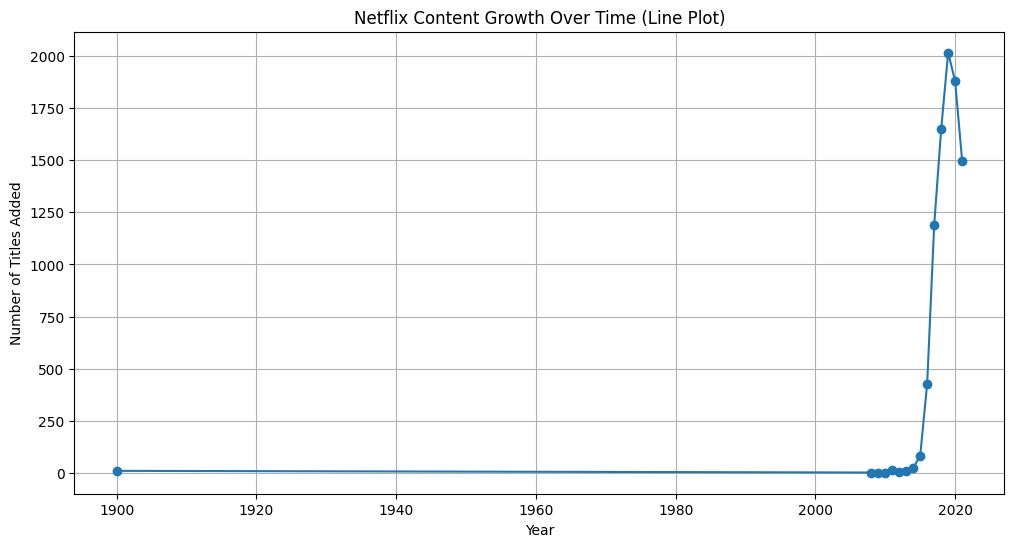

In [0]:
# Group by year_added and count how many titles were added each year
content_per_year = df['year_added'].value_counts().sort_index()

# Plot line graph
plt.figure(figsize=(12,6))
plt.plot(content_per_year.index, content_per_year.values, marker='o')
plt.title('Netflix Content Growth Over Time (Line Plot)')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.show()


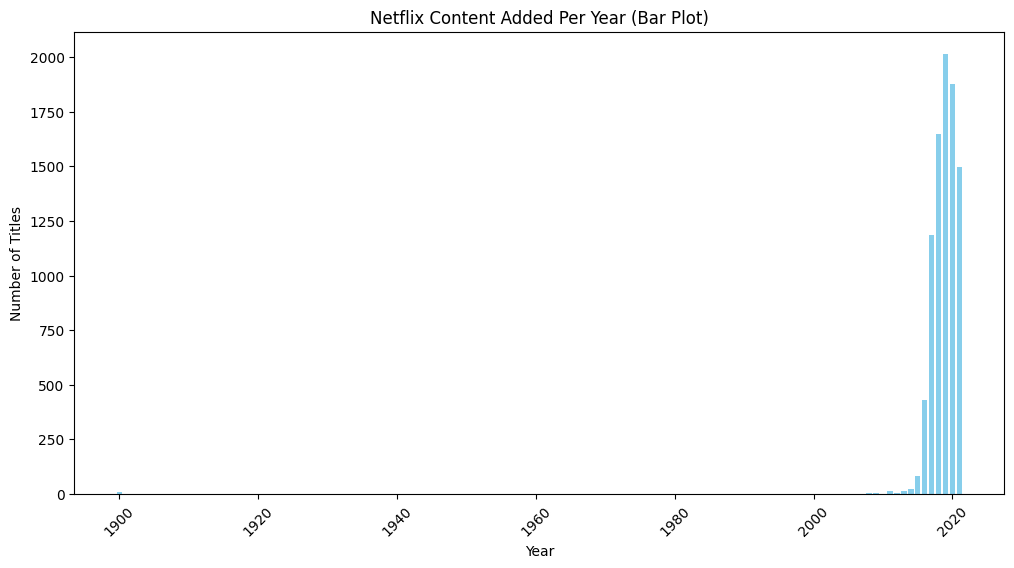

In [0]:
plt.figure(figsize=(12,6))
plt.bar(content_per_year.index, content_per_year.values, color='skyblue')
plt.title('Netflix Content Added Per Year (Bar Plot)')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


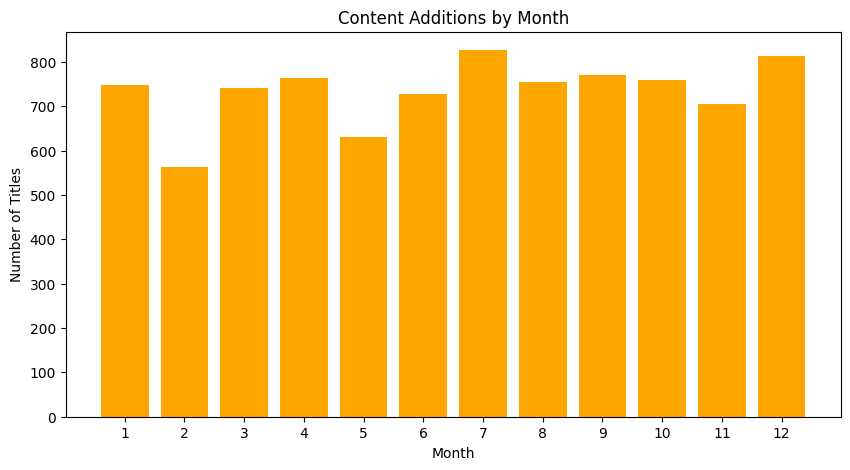

In [0]:
# Extract month number from date_added
df['month_added'] = df['date_added'].dt.month

# Count how many titles were added in each month (across all years)
month_counts = df['month_added'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.bar(month_counts.index, month_counts.values, color='orange')
plt.title('Content Additions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.xticks(range(1,13))
plt.show()


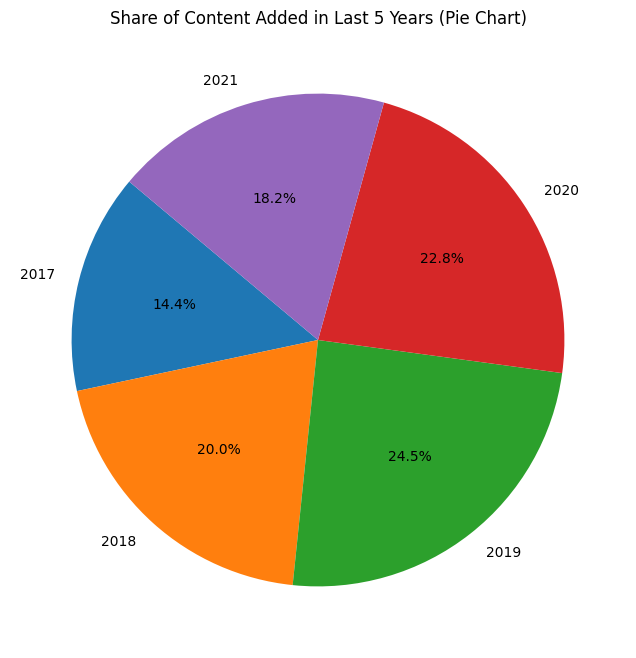

In [0]:
# Took the last 5 years to avoid too many slices
recent_years = content_per_year.tail(5)

plt.figure(figsize=(8,8))
plt.pie(recent_years.values, labels=recent_years.index, autopct='%1.1f%%', startangle=140)
plt.title('Share of Content Added in Last 5 Years (Pie Chart)')
plt.show()


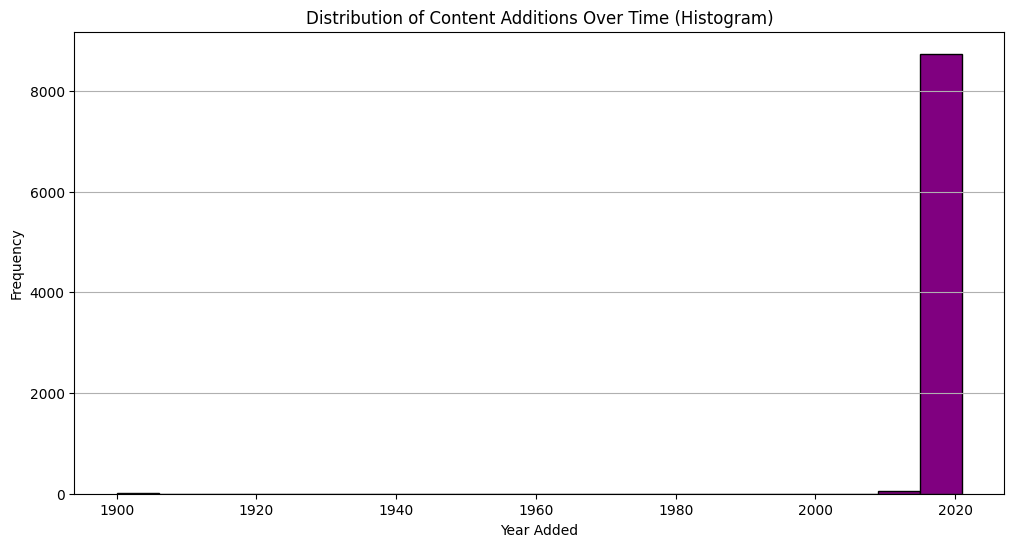

In [0]:
plt.figure(figsize=(12,6))
plt.hist(df['year_added'].dropna(), bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Content Additions Over Time (Histogram)')
plt.xlabel('Year Added')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


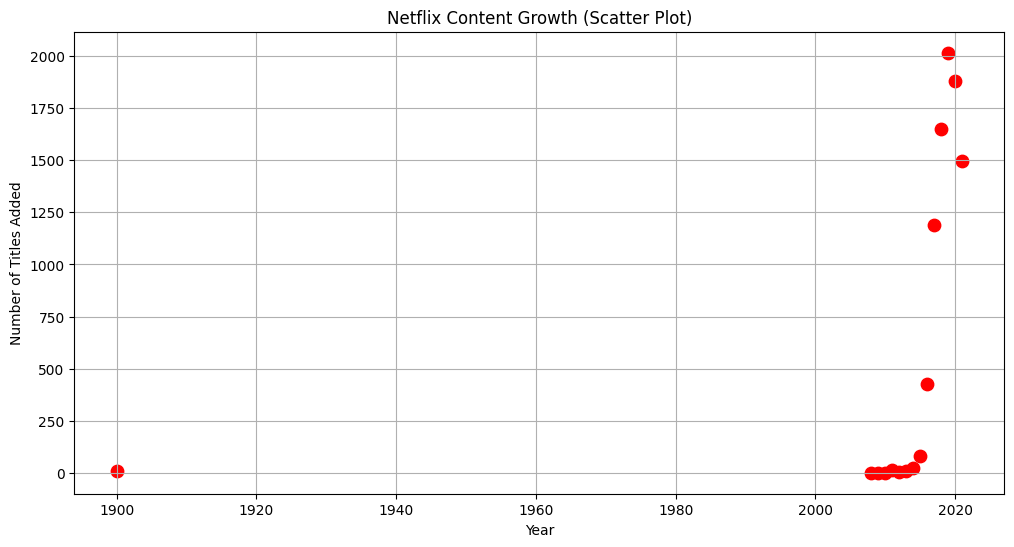

In [0]:
plt.figure(figsize=(12,6))
plt.scatter(content_per_year.index, content_per_year.values, color='red', s=80)
plt.title('Netflix Content Growth (Scatter Plot)')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.show()


International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
TV Comedies                  581
Thrillers                    577
Crime TV Shows               470
Kids' TV                     451
Docuseries                   395
Music & Musicals             375
Romantic TV Shows            370
Horror Movies                357
Stand-Up Comedy              343
Reality TV                   255
dtype: int64

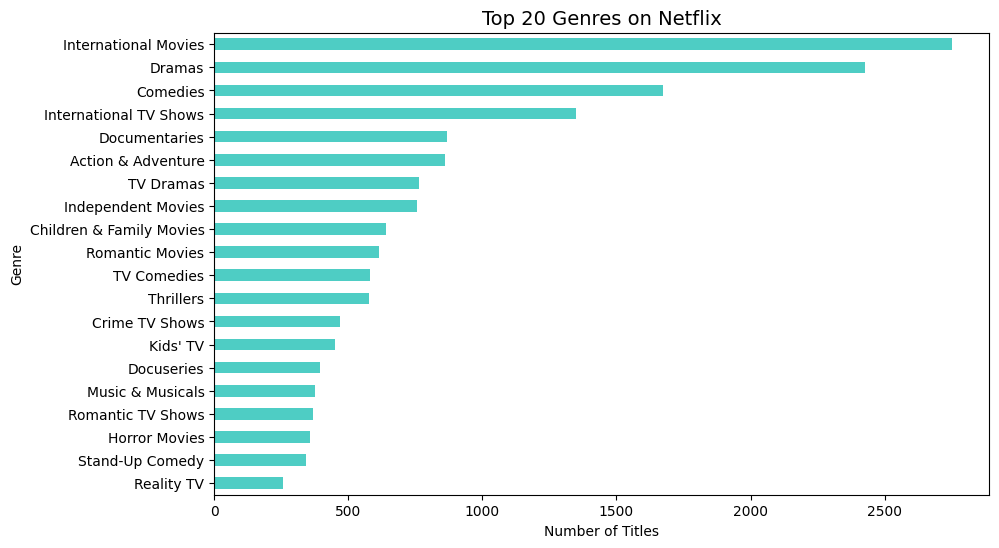

In [0]:
# Genre Distribution
genre_counts = df['listed_in'].dropna().str.split(',', expand=True).stack().str.strip().value_counts()

display(genre_counts.head(20))  # shows top 20 genres

# Plot
plt.figure(figsize=(10,6))
genre_counts.head(20).plot(kind='barh', color='#4ECDC4')
plt.title("Top 20 Genres on Netflix", fontsize=14)
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.gca().invert_yaxis()  # to show highest on top
plt.show()


Movie      6131
TV Show    2676
Name: type, dtype: int64

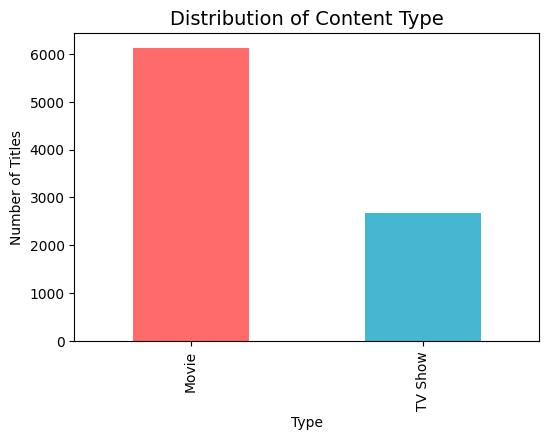

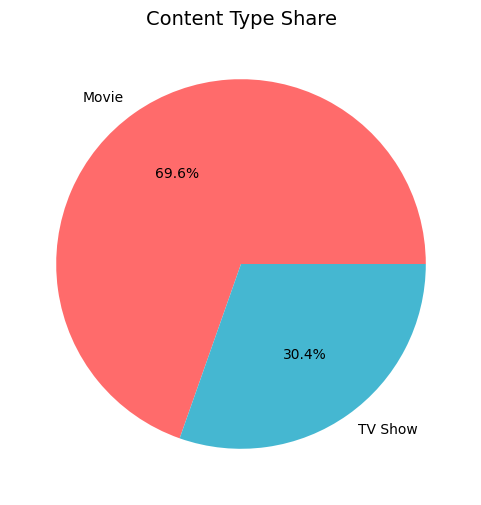

In [0]:
# Content Type Distribution
type_counts = df['type'].value_counts()

display(type_counts)

# Bar Plot
plt.figure(figsize=(6,4))
type_counts.plot(kind='bar', color=['#FF6B6B', '#45B7D1'])
plt.title("Distribution of Content Type", fontsize=14)
plt.xlabel("Type")
plt.ylabel("Number of Titles")
plt.show()

# Pie Chart
plt.figure(figsize=(6,6))
type_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#FF6B6B', '#45B7D1'])
plt.title("Content Type Share", fontsize=14)
plt.ylabel('')
plt.show()


TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
Unrated        4
NC-17          3
UR             3
Name: rating, dtype: int64

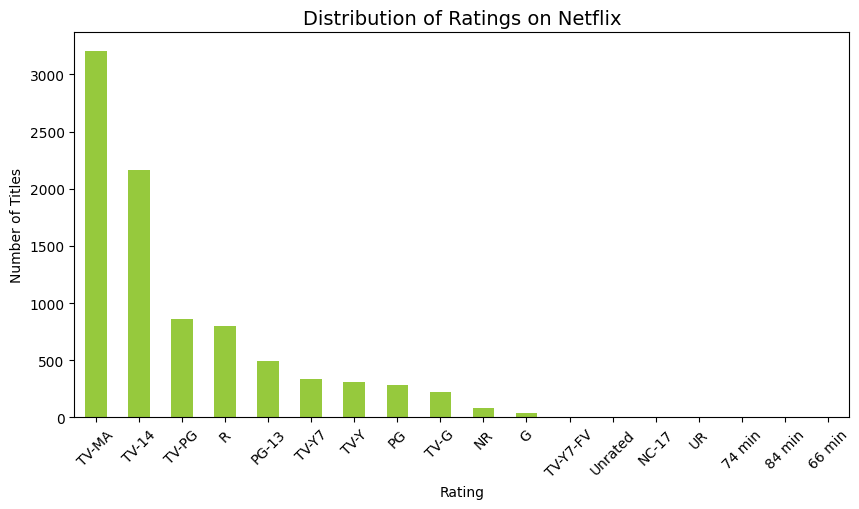

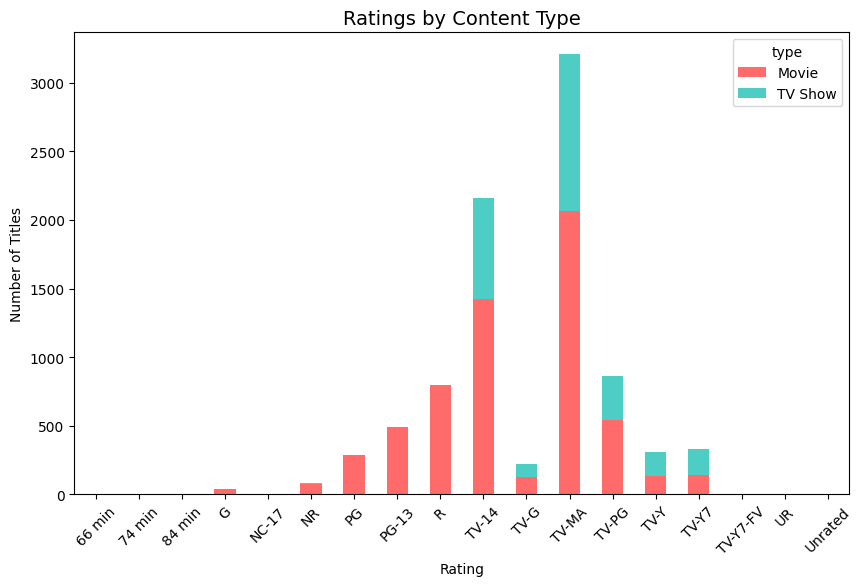

In [0]:
# Ratings Distribution
rating_counts = df['rating'].fillna('Unknown').value_counts()

display(rating_counts.head(15))

plt.figure(figsize=(10,5))
rating_counts.plot(kind='bar', color='#96C93D')
plt.title("Distribution of Ratings on Netflix", fontsize=14)
plt.xlabel("Rating")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

# Optional: stacked bar (Ratings x Type)
cross_tab = pd.crosstab(df['rating'], df['type'])
cross_tab.plot(kind='bar', stacked=True, figsize=(10,6), color=['#FF6B6B', '#4ECDC4'])
plt.title("Ratings by Content Type", fontsize=14)
plt.xlabel("Rating")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()




United States     3690
India             1046
Unknown            831
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
dtype: int64

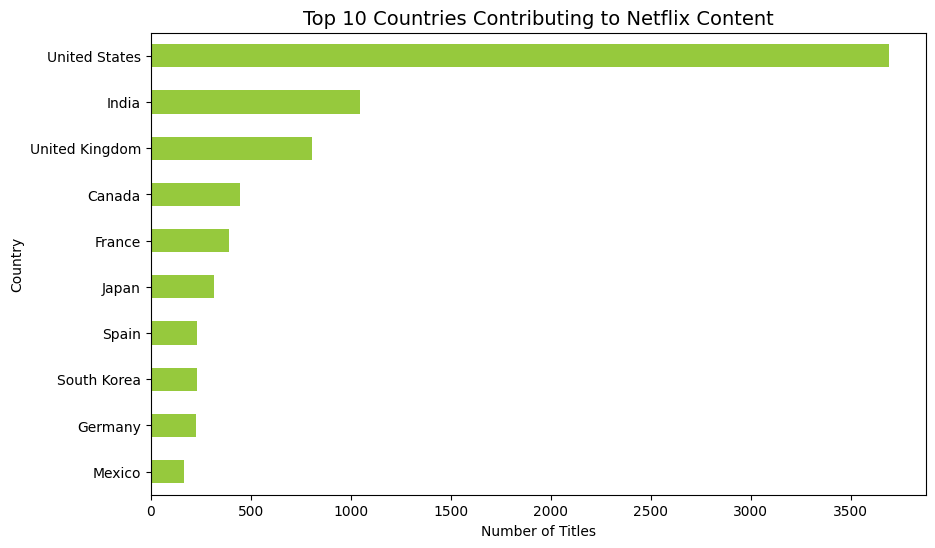

In [0]:
# Country Contribution
country_counts = df['country'].dropna().str.split(',', expand=True).stack().str.strip().value_counts()

display(country_counts.head(10))  # Top 10 countries with most titles
country_counts = country_counts[country_counts.index != 'Unknown']


# Plot
plt.figure(figsize=(10,6))
country_counts.head(10).plot(kind='barh', color='#96C93D')
plt.title("Top 10 Countries Contributing to Netflix Content", fontsize=14)
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.gca().invert_yaxis()
plt.show()


